# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [31]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [32]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [33]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [34]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [35]:
# Extract all rows of data
table = soup.find('table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [36]:
# Create an empty list
data = []
table_headers = table.find('tr').find_all('th')
table_columns = [th.text for th in table_headers]

# Loop through the scraped data to create a list of rows
table_data = table.find_all('tr', class_='data-row')
for tr in table_data:
    tds = tr.find_all('td')
    row_data = [td.text for td in tds]
    data.append(row_data)

In [37]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(data, columns = table_columns)

In [38]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [39]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [40]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = pd.to_numeric(mars_df['sol'])
mars_df['ls'] = pd.to_numeric(mars_df['ls'])
mars_df['month'] = pd.to_numeric(mars_df['month'])
mars_df['min_temp'] = pd.to_numeric(mars_df['min_temp'])
mars_df['pressure'] = pd.to_numeric(mars_df['pressure'])

In [41]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [42]:
# 1. How many months are there on Mars?
max(mars_df['month'])

12

In [43]:
# 2. How many sols (Martian days) worth of data are there?
len(mars_df['sol'].unique())

1867

In [44]:
# 3. What is the average minimum temperature by month?
avg_temp_by_month = mars_df.groupby('month')['min_temp'].mean()
avg_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

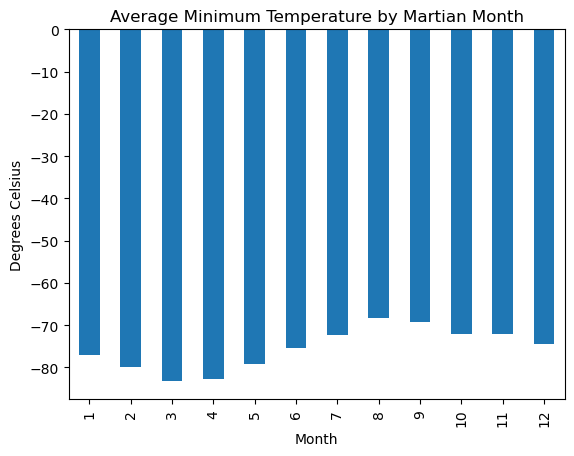

In [45]:
# Plot the average minimum temperature by month
avg_temp_by_month.plot.bar(xlabel='Month', ylabel='Degrees Celsius',
                           title='Average Minimum Temperature by Martian Month');

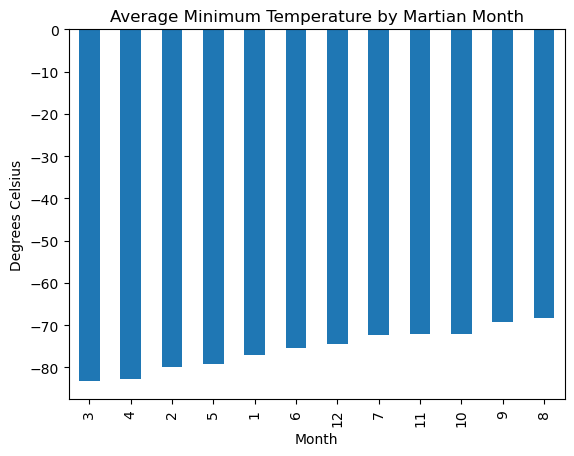

In [46]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_temp_by_month.sort_values().plot.bar(xlabel='Month', ylabel='Degrees Celsius',
                           title='Average Minimum Temperature by Martian Month');

In [47]:
# 4. What is the average pressure by month?
avg_pressue_by_month = mars_df.groupby('month')['pressure'].mean()
avg_pressue_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

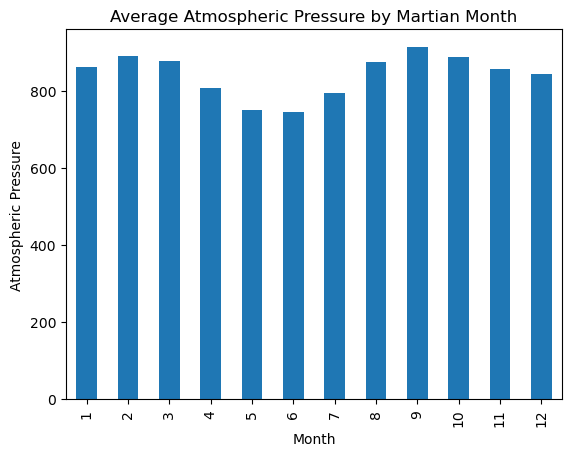

In [48]:
# Plot the average pressure by month
avg_pressue_by_month.plot.bar(xlabel='Month', ylabel='Atmospheric Pressure',
                              title='Average Atmospheric Pressure by Martian Month');

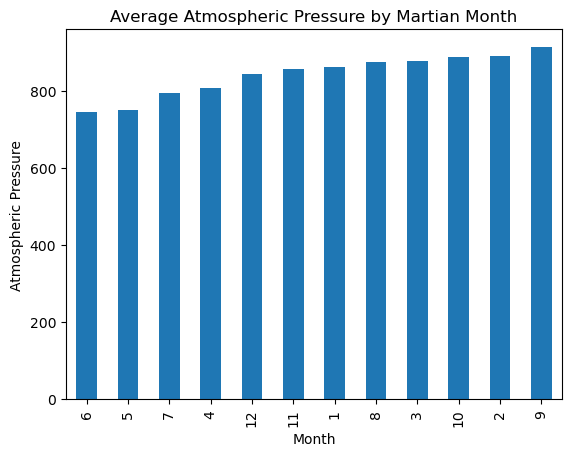

In [49]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressue_by_month.sort_values().plot.bar(xlabel='Month', ylabel='Atmospheric Pressure',
                                            title='Average Atmospheric Pressure by Martian Month');

In [50]:
# 5. How many terrestrial (Earth) days are there in a Martian year?

# Martian years are measured in solar longitudes, with a total of 360 degrees.

# Confirm the min and max degrees of solar longitude:
min_ls = mars_df['ls'].min()
max_ls = mars_df['ls'].max()
print(f"Minimum solar longitude: {min_ls}")
print(f"Maximum solar longitude: {max_ls}")

# Find the index of the first instance of minimum solar longitude (0), which is not the first index of the dataframe
first_day_index = mars_df[mars_df['ls'] == min_ls].first_valid_index()

# Find the index of the first instance of the next solar longitude (to avoid colliding with the minimum ls in the next step)
next_ls_index = mars_df[(mars_df.index > first_day_index) & mars_df['ls'] == (min_ls + 1)].first_valid_index()

# Find the index of the next instance of min_ls after min_ls+1 (i.e., the first day of next year)
next_year_index = mars_df[(mars_df.index > next_ls_index) & (mars_df['ls'] == min_ls)].first_valid_index()

# Subtract 1 from the index to get the index of the last day of the year
last_day_index = next_year_index - 1

# Get the terrestrial date for the first and last day of the Martian year
first_terrestrial_date = mars_df.iloc[first_day_index:first_day_index + 1,:]['terrestrial_date']
last_terrestrial_date = mars_df.iloc[last_day_index:last_day_index + 1,:]['terrestrial_date']

# Subtract the first terrestrial date from the last terrestrial date to find the number of Earth days that have passed during a Martian year
martian_year = (last_terrestrial_date.iloc[0] - first_terrestrial_date.iloc[0]).days
print(f"Terrestrial days in a Martian year: {martian_year}")

Minimum solar longitude: 0
Maximum solar longitude: 359
Terrestrial days in a Martian year: 686


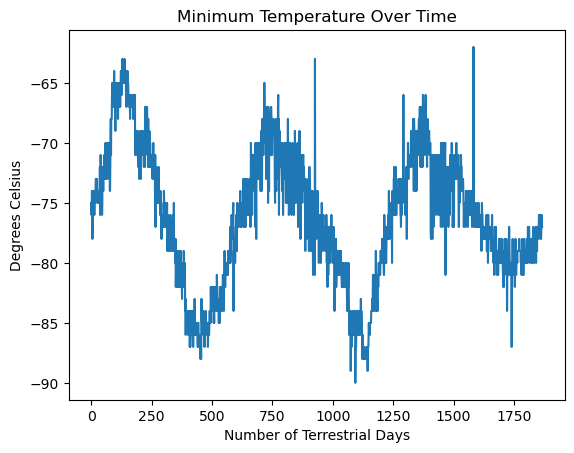

In [51]:
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_df.plot(y='min_temp', xlabel='Number of Terrestrial Days', ylabel='Degrees Celsius', title='Minimum Temperature Over Time', legend=False);

#### Minimum Temperature

Mars' temperature cycles in a wave pattern over the course of a year, with the lowest average (-83.30) in month 3 and the highest (-68.38) in month 8.

#### Atmospheric Pressure

Like temperature, Mars' atmospheric pressure cycles in a wave pattern over the course of a year, with the lowest average (745.05) in month 6 and the highest (913.30) in month 9.

#### Year Length

The Martian year is measured in solar longitudes (ls), over a full 360 degree cycle (0 to 359). We can consider the first instance of ls=0 to be the start of a new year. Then by finding the last instance of the maximum solar longitude (ls=359) before the next ls=0 we can determine the first and last data points for the year. Retrieving the terrestrial dates of these data points and calculating the difference results in a Martian year equal to 686 Earth days.  
  
The graph represents this by showing the peaks and valleys of minimum temperature fluctuation over the course of the data collection period. Looking at the valleys, we can visually match the low point around 450 days with the next low point around 1100 days to see an estimated year of around 650 days. This can also be done with the peaks to get a similar result.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [52]:
# Write the data to a CSV
mars_df.to_csv("Output/mars_weather.csv", index=False)

In [53]:
browser.quit()